In [1]:
import pandas as pd

In [2]:
bookings = pd.read_csv('bookings.csv')
bookings.head(2)


,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5


In [18]:
sessions = pd.read_csv('sessions.csv')
sessions.head(2)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN


In [4]:
#Find the number of distinct bookings, sessions, and searches from the given datasets.
distinct_bookings = bookings['booking_id'].nunique()
distinct_sessions = sessions['session_id'].nunique()
distinct_searches = sessions['search_id'].nunique()
print(distinct_bookings, distinct_sessions, distinct_searches)

339 331 1360


In [5]:
#)How many sessions have more than one booking?
sessions_with_multiple_bookings = sessions.groupby('session_id').size()
sessions_with_multiple_bookings = sessions_with_multiple_bookings[sessions_with_multiple_bookings > 1]
print(len(sessions_with_multiple_bookings))



237


day with highest bookings: Thursday


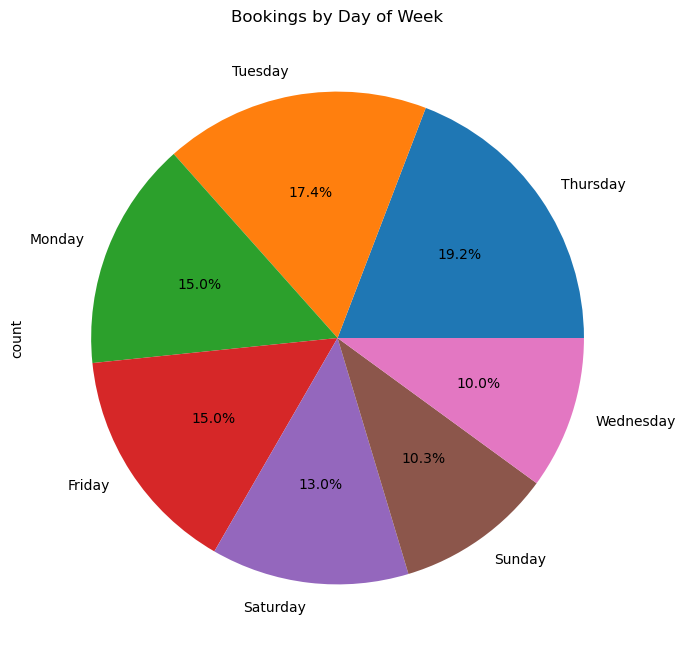

In [6]:
#3)Which day of the week have the highest number of bookings?
# Also,draw a piechart to show the distribution for all days of the week?
bookings['booking_date'] = pd.to_datetime(bookings['booking_time'])

bookings['day_of_week'] = bookings['booking_date'].dt.day_name()
bookings_by_day = bookings['day_of_week'].value_counts()
print('day with highest bookings:', bookings_by_day.idxmax())
piechart = bookings_by_day.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Bookings by Day of Week')

In [7]:
#For each of the service names,display the total number of bookings and the total Gross Booking Value in INR
service_summary = bookings.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gross_booking_value=('INR_Amount', 'sum')
).reset_index()
service_summary 

,service_name,total_bookings,total_gross_booking_value
0,GOIBIBO,186,5897637.97
1,MMT,48,665669.08
2,YATRA,105,3378702.13


In [8]:
#5)For customers who have more than 1 booking,which is the most booked route(from_cityto to_city)?
customer_bookings = bookings[bookings.duplicated(subset='customer_id', keep=False)]
most_booked_route = customer_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='booking_count')
most_booked_route = most_booked_route.sort_values(by='booking_count', ascending=False).head(1)
print('Most booked route:', most_booked_route[['from_city', 'to_city', 'booking_count']].values[0])

Most booked route: ['Gurgaon' 'Roissy-en-France' 5]


In [9]:
# Filter bookings made in advance (days_to_departure > 1)
advance_bookings = bookings[bookings['days_to_departure'] > 1]

# Group by from_city and count number of advance bookings
departure_counts = advance_bookings.groupby('from_city').size().reset_index(name='departure_count')

# Filter cities with at least 5 advance bookings
filtered_departure_counts = departure_counts[departure_counts['departure_count'] >= 5]

# Get top 3 cities with most advance bookings
top_3_departure_cities = filtered_departure_counts.sort_values(by='departure_count', ascending=False).head(3)

print('Top 3 departure cities with most advance bookings (at least 5 bookings):')
print(top_3_departure_cities)


Top 3 departure cities with most advance bookings (at least 5 bookings):
   from_city  departure_count
13   Gurgaon              122
22    Mumbai               29
8      Delhi               24


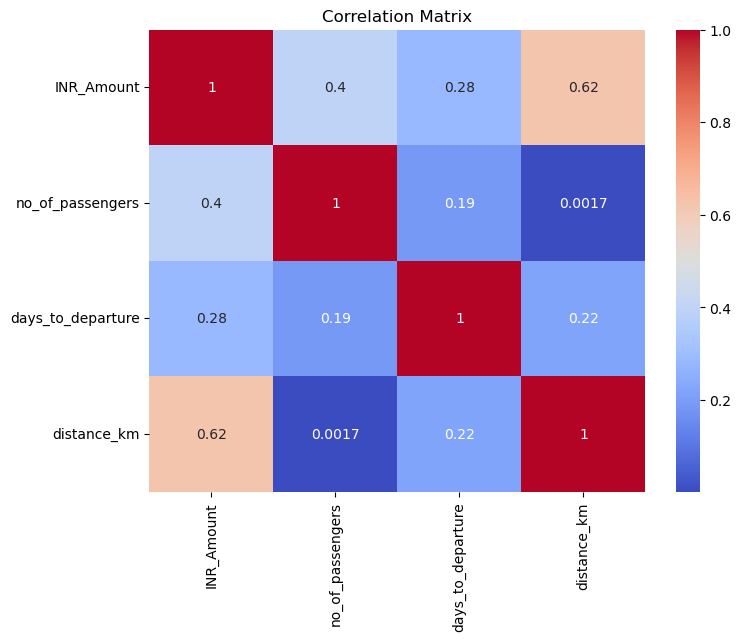

Highest correlated pair of numerical columns:
      Column1      Column2  Correlation
3  INR_Amount  distance_km     0.623565


In [10]:
#map displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset,have the maximum correlation?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (only numeric columns)
correlation_matrix = bookings.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Find highest correlated pair (excluding self-pairs)
# Step 1: Flatten and remove self-pairs
corr_pairs = correlation_matrix.stack().reset_index()
corr_pairs.columns = ['Column1', 'Column2', 'Correlation']
filtered = corr_pairs[corr_pairs['Column1'] != corr_pairs['Column2']]

# Step 2: Find max correlation
top_pair = filtered.sort_values(by='Correlation', ascending=False).head(1)

# Display result
print("Highest correlated pair of numerical columns:")
print(top_pair)




In [11]:
#8)For each service,which is the most used device type for making bookings on the platform?
device_usage = bookings.groupby(['service_name', 'device_type_used']).size().reset_index(name='booking_count')
most_used_device = device_usage.loc[device_usage.groupby('service_name')['booking_count'].idxmax()]
print('Most used device type for each service:')
print(most_used_device[['service_name', 'device_type', 'booking_count']])



Most used device type for each service:


KeyError: "['device_type'] not in index"

C:\Users\abija\AppData\Local\Temp\ipykernel_22044\493951992.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['quarter'] = bookings['booking_date'].dt.to_period('Q')


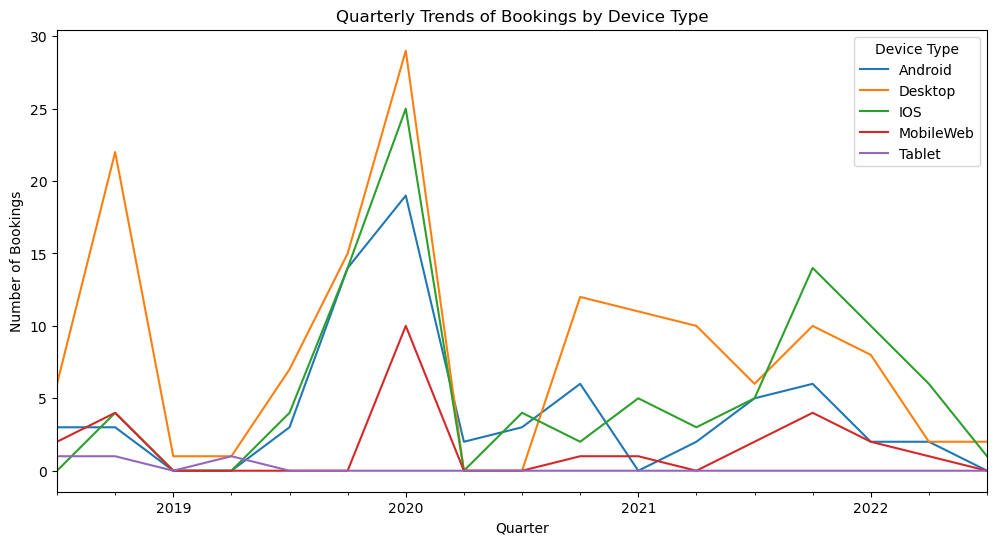

In [ ]:
#9)Plot the trends at quarterly frequency for the number of bookings by each of the device types.
bookings['booking_date'] = pd.to_datetime(bookings['booking_time'])
bookings['quarter'] = bookings['booking_date'].dt.to_period('Q')
quarterly_trends = bookings.groupby(['quarter', 'device_type_used']).size().unstack(fill_value=0)
quarterly_trends.plot(kind='line', figsize=(12, 6))
plt.title('Quarterly Trends of Bookings by Device Type')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.show()

C:\Users\abija\AppData\Local\Temp\ipykernel_20304\3564780344.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings.groupby(bookings['booking_time'].dt.to_period('M')).size()
C:\Users\abija\AppData\Local\Temp\ipykernel_20304\3564780344.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  / sessions.groupby(sessions['search_time'].dt.to_period('M')).size()
C:\Users\abija\AppData\Local\Temp\ipykernel_20304\3564780344.py:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings.groupby(bookings['booking_time'].dt.to_period('D')).size()
C:\Users\abija\AppData\Local\Temp\ipykernel_20304\3564780344.py:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  / sessions.groupby(sessions['search_time'].dt.to_period('D')).size()


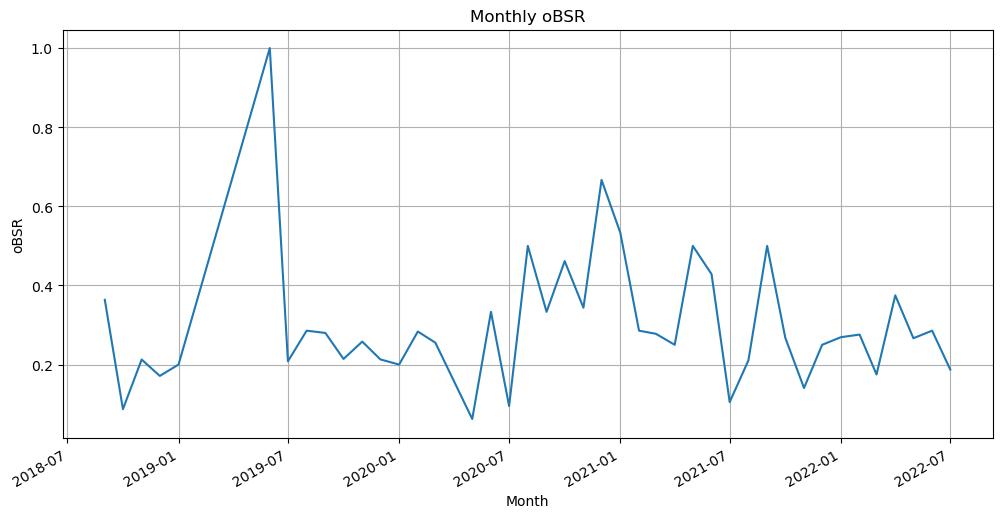

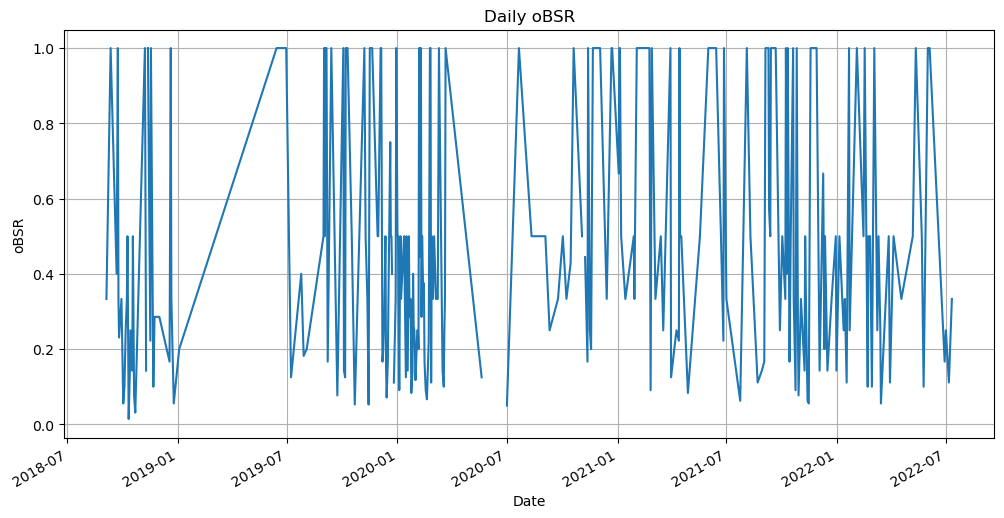

In [17]:
#10)Considerthefollowingexample:
# 12 customers performed a total of 100 searches but only a few of them performed 10 bookings intotal.
# Searches= 100 bookings =10 customers= 12 
# The overallbooking to searchratio,Ober,is 10/100=0.1
# Usingtheaboveinformation/context,answerthe following:
# What is the average oBSR for eachmonth of the year?•
# What is the average oBSR for each day of the week?•
# Plot a time series of oBSR on all the given dates.
# Convert columns to datetime format first
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'], format='mixed')
sessions['search_time'] = pd.to_datetime(sessions['search_time'], format='mixed')
import matplotlib.pyplot as plt

# Monthly oBSR
obsr_monthly = (
    bookings.groupby(bookings['booking_time'].dt.to_period('M')).size()
    / sessions.groupby(sessions['search_time'].dt.to_period('M')).size()
)

# Daily oBSR
obsr_daily = (
    bookings.groupby(bookings['booking_time'].dt.to_period('D')).size()
    / sessions.groupby(sessions['search_time'].dt.to_period('D')).size()
)

# Convert index back to datetime for plotting
obsr_monthly.index = obsr_monthly.index.to_timestamp()
obsr_daily.index = obsr_daily.index.to_timestamp()

# Plot Monthly oBSR
obsr_monthly.plot(kind='line', figsize=(12, 6), title='Monthly oBSR')
plt.xlabel('Month')
plt.ylabel('oBSR')
plt.grid(True)
plt.show()

# Plot Daily oBSR
obsr_daily.plot(kind='line', figsize=(12, 6), title='Daily oBSR')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True)
plt.show()
